<a href="https://colab.research.google.com/github/BharathiNGopalsamy/FIIP/blob/main/FIIP_inventory_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_excel('inventory.xlsx')

In [ ]:
df

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1,2017-01-01,24,4,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,6
1,2,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Action Figure,Toys,$9.99,$15.99,27
2,3,2017-01-01,6,8,1,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Deck Of Cards,Games,$3.99,$6.99,63
3,4,2017-01-01,48,7,1,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,Dart Gun,Sports & Outdoors,$11.99,$15.99,5
4,5,2017-01-01,44,18,1,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,Lego Bricks,Toys,$34.99,$39.99,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,24,19,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Magic Sand,Art & Crafts,$13.99,$15.99,25
829258,829259,2018-09-30,16,35,1,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,Uno Card Game,Games,$3.99,$7.99,12
829259,829260,2018-09-30,22,19,1,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,Magic Sand,Art & Crafts,$13.99,$15.99,25
829260,829261,2018-09-30,13,2,2,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,Animal Figures,Toys,$9.99,$12.99,0


In [ ]:
df = df.drop(['Date','Store_Open_Date'],axis=1)

In [ ]:
df

,Sale_ID,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1,24,4,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,Chutes & Ladders,Games,$9.99,$12.99,6
1,2,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,Action Figure,Toys,$9.99,$15.99,27
2,3,6,8,1,Maven Toys Mexicali 1,Mexicali,Commercial,Deck Of Cards,Games,$3.99,$6.99,63
3,4,48,7,1,Maven Toys Saltillo 2,Saltillo,Commercial,Dart Gun,Sports & Outdoors,$11.99,$15.99,5
4,5,44,18,1,Maven Toys Puebla 3,Puebla,Residential,Lego Bricks,Toys,$34.99,$39.99,11
...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,24,19,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,Magic Sand,Art & Crafts,$13.99,$15.99,25
829258,829259,16,35,1,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,Uno Card Game,Games,$3.99,$7.99,12
829259,829260,22,19,1,Maven Toys Guanajuato 2,Guanajuato,Commercial,Magic Sand,Art & Crafts,$13.99,$15.99,25
829260,829261,13,2,2,Maven Toys Mexicali 2,Mexicali,Downtown,Animal Figures,Toys,$9.99,$12.99,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_df_2 = LabelEncoder()
df['Store_Name'] = labelencoder_df_2.fit_transform(df['Store_Name'])
df['Store_City'] = labelencoder_df_2.fit_transform(df['Store_City'])
df['Store_Location'] = labelencoder_df_2.fit_transform(df['Store_Location'])
df['Product_Name'] = labelencoder_df_2.fit_transform(df['Product_Name'])
df['Product_Category'] = labelencoder_df_2.fit_transform(df['Product_Category'])
df[df.columns[9:11]] = df[df.columns[9:11]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df.columns

Index(['Sale_ID', 'Store_ID', 'Product_ID', 'Units', 'Store_Name',
       'Store_City', 'Store_Location', 'Product_Name', 'Product_Category',
       'Product_Cost', 'Product_Price', 'Stock_On_Hand'],
      dtype='object')

In [ ]:
df

,Sale_ID,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1,24,4,1,0,0,2,3,2,9.99,12.99,6
1,2,28,1,1,37,20,2,0,4,9.99,15.99,27
2,3,6,8,1,27,15,1,7,2,3.99,6.99,63
3,4,48,7,1,40,21,1,6,3,11.99,15.99,5
4,5,44,18,1,38,20,3,17,4,34.99,39.99,11
...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,24,19,1,0,0,2,18,0,13.99,15.99,25
829258,829259,16,35,1,41,22,2,34,2,3.99,7.99,12
829259,829260,22,19,1,20,11,1,18,0,13.99,15.99,25
829260,829261,13,2,2,28,15,2,1,4,9.99,12.99,0


In [ ]:
kmeans = KMeans(2)
kmeans.fit(df[['Units', 'Stock_On_Hand']])

KMeans(n_clusters=2)

In [ ]:
identified_labels = kmeans.fit_predict(df[['Units', 'Stock_On_Hand']])
identified_labels

array([1, 1, 0, ..., 1, 1, 0])

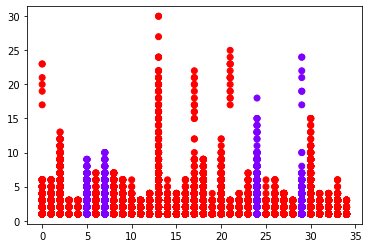

In [ ]:
df_with_clusters = df.copy()
df_with_clusters['Clusters'] = identified_labels 
plt.scatter(df_with_clusters['Product_Name'],df_with_clusters['Units'],c=df_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
#df_with_clusters.to_excel("output.xlsx")
df_with_clusters

,Sale_ID,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand,Clusters
0,1,24,4,1,0,0,2,3,2,9.99,12.99,6,1
1,2,28,1,1,37,20,2,0,4,9.99,15.99,27,1
2,3,6,8,1,27,15,1,7,2,3.99,6.99,63,0
3,4,48,7,1,40,21,1,6,3,11.99,15.99,5,1
4,5,44,18,1,38,20,3,17,4,34.99,39.99,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,24,19,1,0,0,2,18,0,13.99,15.99,25,1
829258,829259,16,35,1,41,22,2,34,2,3.99,7.99,12,1
829259,829260,22,19,1,20,11,1,18,0,13.99,15.99,25,1
829260,829261,13,2,2,28,15,2,1,4,9.99,12.99,0,1


In [ ]:
X = pd.DataFrame(df_with_clusters.iloc[:, 0:12].values)
y = df_with_clusters.iloc[:, 12].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
df_with_clusters

,Sale_ID,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand,Clusters
0,1,24,4,1,0,0,2,3,2,9.99,12.99,6,1
1,2,28,1,1,37,20,2,0,4,9.99,15.99,27,1
2,3,6,8,1,27,15,1,7,2,3.99,6.99,63,0
3,4,48,7,1,40,21,1,6,3,11.99,15.99,5,1
4,5,44,18,1,38,20,3,17,4,34.99,39.99,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,24,19,1,0,0,2,18,0,13.99,15.99,25,1
829258,829259,16,35,1,41,22,2,34,2,3.99,7.99,12,1
829259,829260,22,19,1,20,11,1,18,0,13.99,15.99,25,1
829260,829261,13,2,2,28,15,2,1,4,9.99,12.99,0,1


In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
X,y


(              0     1     2    3     4     5    6     7    8      9      10  \
 0            1.0  24.0   4.0  1.0   0.0   0.0  2.0   3.0  2.0   9.99  12.99   
 1            2.0  28.0   1.0  1.0  37.0  20.0  2.0   0.0  4.0   9.99  15.99   
 2            3.0   6.0   8.0  1.0  27.0  15.0  1.0   7.0  2.0   3.99   6.99   
 3            4.0  48.0   7.0  1.0  40.0  21.0  1.0   6.0  3.0  11.99  15.99   
 4            5.0  44.0  18.0  1.0  38.0  20.0  3.0  17.0  4.0  34.99  39.99   
 ...          ...   ...   ...  ...   ...   ...  ...   ...  ...    ...    ...   
 829257  829258.0  24.0  19.0  1.0   0.0   0.0  2.0  18.0  0.0  13.99  15.99   
 829258  829259.0  16.0  35.0  1.0  41.0  22.0  2.0  34.0  2.0   3.99   7.99   
 829259  829260.0  22.0  19.0  1.0  20.0  11.0  1.0  18.0  0.0  13.99  15.99   
 829260  829261.0  13.0   2.0  2.0  28.0  15.0  2.0   1.0  4.0   9.99  12.99   
 829261  829262.0  32.0   6.0  1.0  22.0  12.0  3.0   5.0  1.0   6.99  14.99   
 
           11  
 0        6.0  
 1    

In [ ]:
y_train.shape

(663409,)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

In [ ]:
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 1)

663409/663409 [==============================] - 2893s 4ms/step - loss: 1.0430e-09 - accuracy: 1.0000


In [ ]:
X_test.shape

(165853, 12)

In [ ]:
#y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5) 
y_pred = y_pred.astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 49109      0]
 [     0 116744]]


1.0

In [ ]:
y_test.dtype

dtype('int32')

In [ ]:
y_pred.dtype

dtype('float32')